a) CARREGAMENTO DOS DADOS
‚úì Arquivo data_preg.mat carregado com sucesso
‚úì 53 pontos carregados
  X: min=0.00, max=5.20
  Y: min=-0.85, max=1.93

b) GR√ÅFICO DE DISPERS√ÉO DOS DADOS


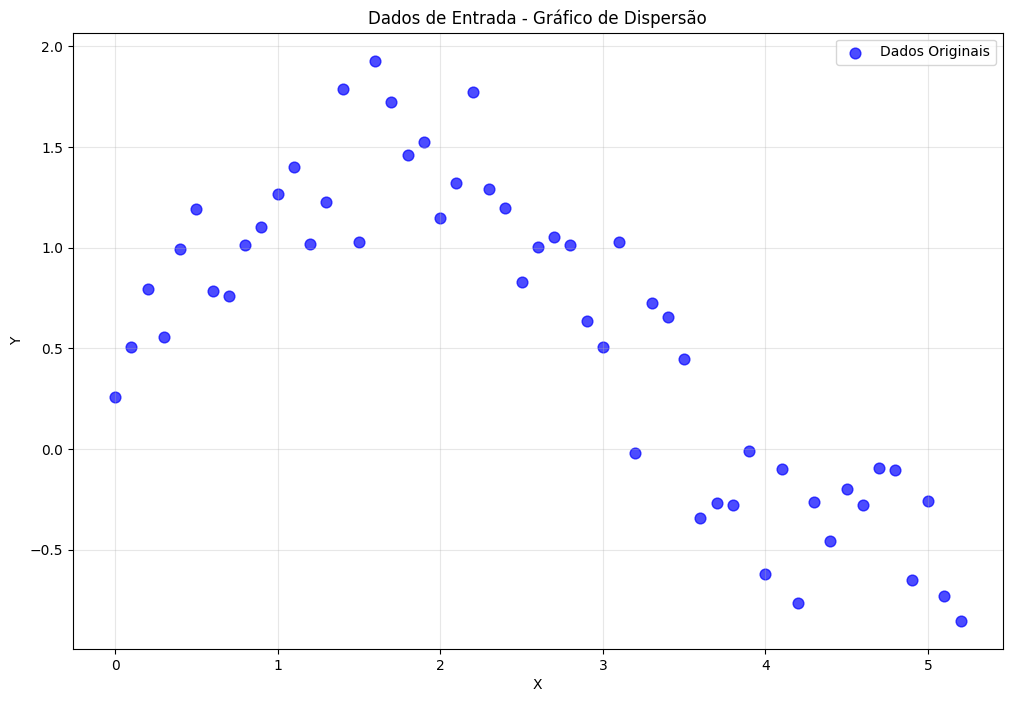


c-f) REGRESS√ÉO POLINOMIAL - DIFERENTES GRAUS

Grau 1: y = -0.3612x + 1.5179

Grau 2: y = -0.1706x^2 + 0.5261x + 0.7637

Grau 3: y = 0.0872x^3 - 0.8504x^2 + 1.9267x + 0.1858

Grau 8: y = -0.0044x^8 + 0.0904x^7 - 0.7595x^6 + 3.3908x^5 - 8.5662x^4 + 11.9849x^3 - 8.7404x^2 + 3.5103x + 0.2614


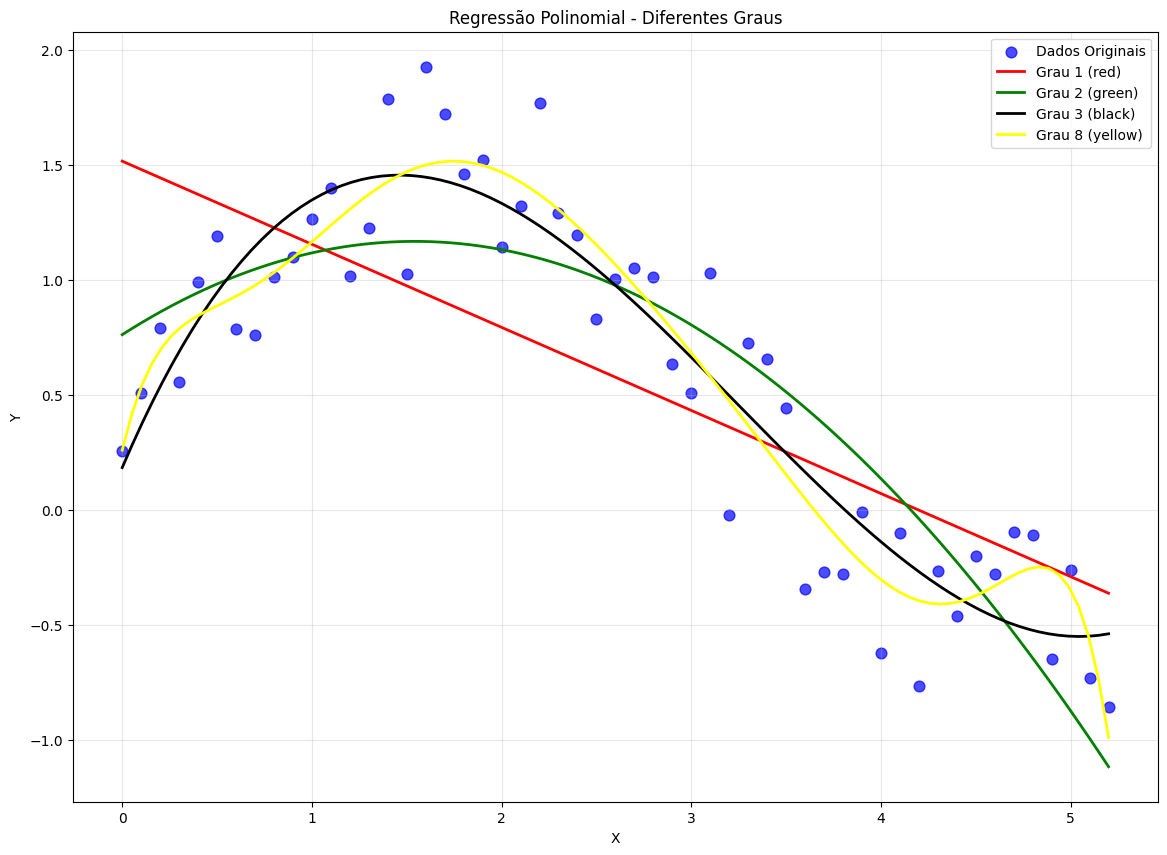


g) ERRO QUADR√ÅTICO M√âDIO (EQM)
Grau 1: EQM = 0.265932
Grau 2: EQM = 0.138526
Grau 3: EQM = 0.078697
Grau 8: EQM = 0.058710

‚úì Modelo mais preciso (menor EQM): Grau 8

h) DIVIS√ÉO DOS DADOS (90% TREINO, 10% TESTE)
‚úì Dados de treino: 47 pontos
‚úì Dados de teste: 6 pontos

i) REGRESS√ÉO COM DADOS DE TREINO


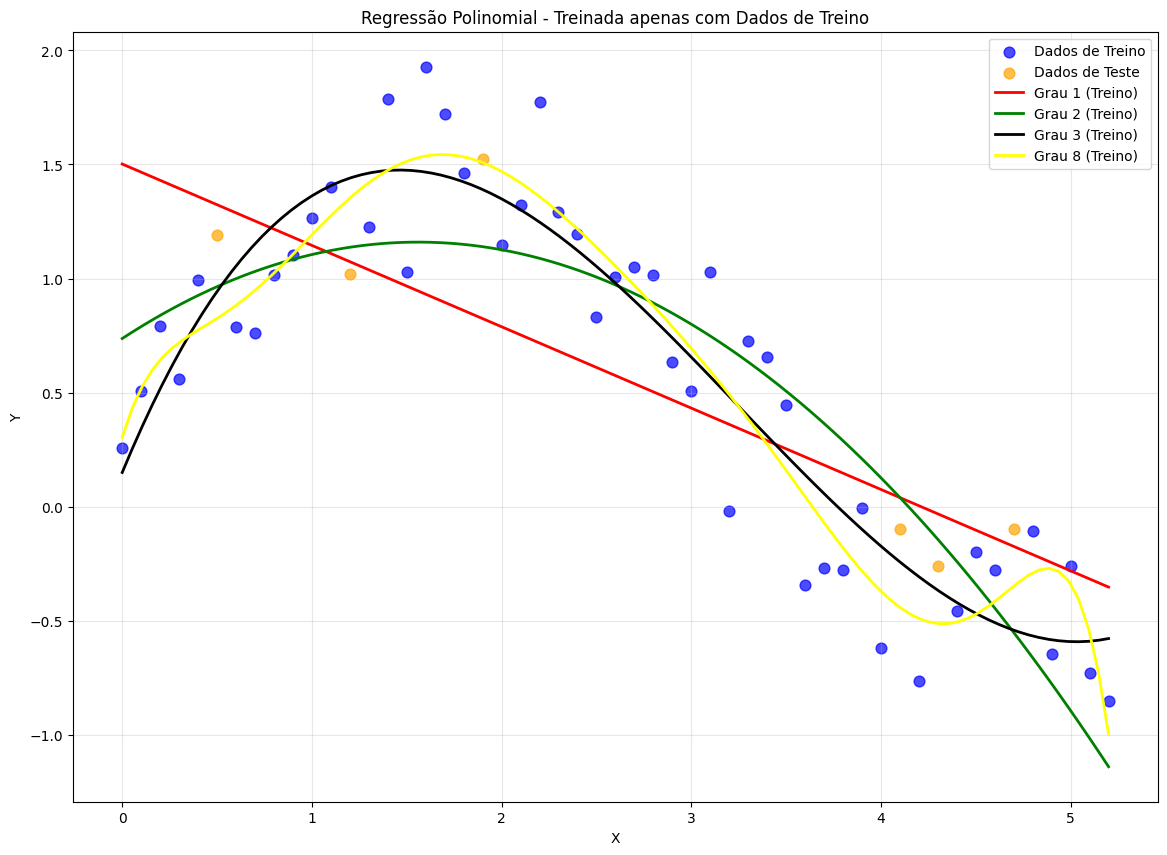


j) EQM CALCULADO COM DADOS DE TESTE
Grau 1: EQM (teste) = 0.098282
Grau 2: EQM (teste) = 0.075735
Grau 3: EQM (teste) = 0.081460
Grau 8: EQM (teste) = 0.081882

‚úì Modelo mais preciso no teste (menor EQM): Grau 2

k) COEFICIENTE DE DETERMINA√á√ÉO (R¬≤)
Grau   R¬≤ Treino    R¬≤ Teste     EQM Treino   EQM Teste
------------------------------------------------------------
1      0.5033       0.8083       0.287409     0.098282    
2      0.7463       0.8522       0.146778     0.075735    
3      0.8633       0.8411       0.079112     0.081460    
8      0.8996       0.8403       0.058098     0.081882    

l) AN√ÅLISE E CONCLUS√ïES
OBSERVA√á√ïES SOBRE OVERFITTING:
‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

1. COMPARA√á√ÉO R¬≤ TREINO vs TESTE:
   Grau 1: Œî = -0.3050 üü¢ OK
   Grau 2: Œî = -0.1059 üü¢ OK
   Grau 3: Œî = 0.0222 üü¢ OK
   Grau 8: Œî = 0.0593 üü° ATEN√á√ÉO

2. AVALIA√á√ÉO COMPLETA DOS MODELOS (

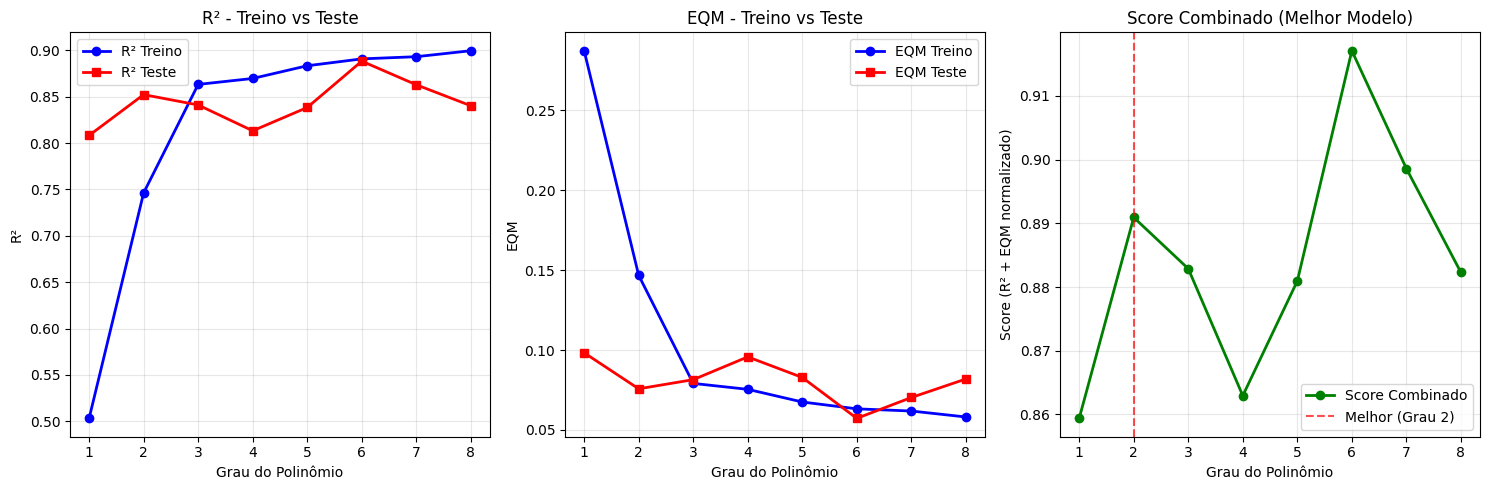


‚úì Script conclu√≠do! Modelo recomendado: Grau 2
  (R¬≤ = 0.8522, EQM = 0.075735)


In [1]:
import matplotlib.pyplot as plt  # Para cria√ß√£o de gr√°ficos
import numpy as np              # Para opera√ß√µes matem√°ticas e arrays
import pandas as pd             # Para manipula√ß√£o de dados
from sklearn.metrics import r2_score  # Apenas R¬≤ da sklearn
from sklearn.model_selection import train_test_split     # Divis√£o treino/teste

# =============================================================================
# FUN√á√ïES AUXILIARES
# =============================================================================

def calcular_polinomio(x, coeficientes):
    """
    Calcula y = Œ≤‚ÇÄ + Œ≤‚ÇÅX + Œ≤‚ÇÇX¬≤ + Œ≤‚ÇÉX¬≥ + ... + Œ≤‚ÇôX‚Åø
    Nota: coeficientes do polyfit v√™m em ordem reversa [Œ≤‚Çô, Œ≤‚Çô‚Çã‚ÇÅ, ..., Œ≤‚ÇÅ, Œ≤‚ÇÄ]
    """
    grau = len(coeficientes) - 1                    # Determina o grau do polin√¥mio
    y = np.zeros_like(x)                           # Inicializa array y com zeros
    
    for i, coef in enumerate(coeficientes):        # Para cada coeficiente
        potencia = grau - i                        # Calcula a pot√™ncia correspondente
        y += coef * (x ** potencia)                # Adiciona o termo ao polin√¥mio
    
    return y                                       # Retorna valores calculados

def calcular_eqm(y_real, y_pred):
    """
    Calcula o Erro Quadr√°tico M√©dio (EQM) manualmente
    EQM = (1/n) * Œ£(y_real - y_pred)¬≤
    """
    n = len(y_real)                                # N√∫mero de amostras
    erro_quadratico = (y_real - y_pred) ** 2       # Calcula erro quadr√°tico
    eqm = np.sum(erro_quadratico) / n              # M√©dia dos erros quadr√°ticos
    return eqm                                     # Retorna EQM

def exibir_equacao(coeficientes, grau):
    """Exibe a equa√ß√£o do polin√¥mio de forma leg√≠vel"""
    eq = "y = "                                    # Inicia string da equa√ß√£o
    for i, coef in enumerate(coeficientes):        # Para cada coeficiente
        potencia = grau - i                        # Calcula pot√™ncia
        
        if i > 0:                                  # Se n√£o √© o primeiro termo
            eq += " + " if coef >= 0 else " - "    # Adiciona sinal
            coef = abs(coef)                       # Usa valor absoluto
        
        if potencia == 0:                          # Termo constante
            eq += f"{coef:.4f}"
        elif potencia == 1:                        # Termo linear
            eq += f"{coef:.4f}x"
        else:                                      # Termos de pot√™ncia maior
            eq += f"{coef:.4f}x^{potencia}"
    
    return eq                                      # Retorna equa√ß√£o formatada

def avaliar_modelo(y_real, y_pred):
    """
    Avalia modelo considerando EQM (pr√≥ximo de 0) e R¬≤ (pr√≥ximo de 1)
    Retorna um score combinado para compara√ß√£o
    """
    eqm = calcular_eqm(y_real, y_pred)            # Calcula EQM
    r2 = r2_score(y_real, y_pred)                 # Calcula R¬≤
    
    # Score combinado: R¬≤ alto e EQM baixo = score alto
    # Normaliza EQM para evitar que domine o score
    eqm_normalizado = 1 / (1 + eqm)               # Transforma EQM em valor entre 0 e 1
    score = (r2 + eqm_normalizado) / 2            # M√©dia entre R¬≤ e EQM normalizado
    
    return score, eqm, r2                         # Retorna score, EQM e R¬≤

# =============================================================================
# a) CARREGAMENTO DOS DADOS
# =============================================================================

print("a) CARREGAMENTO DOS DADOS")              # Cabe√ßalho da se√ß√£o
print("=" * 60)

# Tentativa de carregar arquivo .mat ou .csv
try:
    import scipy.io as scipy                       # Importa scipy para arquivos .mat
    mat = scipy.loadmat('data_preg.mat')          # Carrega arquivo .mat
    data = mat['data']                            # Extrai dados
    x_data = data[:, 0]                           # Primeira coluna = x
    y_data = data[:, 1]                           # Segunda coluna = y
    print("‚úì Arquivo data_preg.mat carregado com sucesso")
except:                                           # Se falhar
    try:
        data = pd.read_csv('data_preg.csv', header=None)  # Tenta carregar .csv
        x_data = data.iloc[:, 0].values           # Primeira coluna = x
        y_data = data.iloc[:, 1].values           # Segunda coluna = y
        print("‚úì Arquivo data_preg.csv carregado com sucesso")
    except:                                       # Se ambos falharem
        # Gerar dados sint√©ticos para demonstra√ß√£o
        print("‚ö† Arquivos n√£o encontrados. Gerando dados sint√©ticos...")
        np.random.seed(42)                        # Seed para reprodutibilidade
        x_data = np.linspace(0, 4, 20)           # 20 pontos entre 0 e 4
        y_data = 0.5 * x_data**3 - 2 * x_data**2 + x_data + 1 + np.random.normal(0, 0.5, 20)  # Fun√ß√£o c√∫bica + ru√≠do

print(f"‚úì {len(x_data)} pontos carregados")      # Mostra quantidade de pontos
print(f"  X: min={x_data.min():.2f}, max={x_data.max():.2f}")  # Range de X
print(f"  Y: min={y_data.min():.2f}, max={y_data.max():.2f}")  # Range de Y

# =============================================================================
# b) GR√ÅFICO DE DISPERS√ÉO
# =============================================================================

print("\nb) GR√ÅFICO DE DISPERS√ÉO DOS DADOS")    # Cabe√ßalho da se√ß√£o
print("=" * 60)

plt.figure(figsize=(12, 8))                      # Cria figura com tamanho espec√≠fico
plt.scatter(x_data, y_data, alpha=0.7, s=60, color='blue', label='Dados Originais')  # Scatter plot
plt.xlabel('X')                                  # R√≥tulo eixo X
plt.ylabel('Y')                                  # R√≥tulo eixo Y
plt.title('Dados de Entrada - Gr√°fico de Dispers√£o')  # T√≠tulo do gr√°fico
plt.legend()                                     # Mostra legenda
plt.grid(True, alpha=0.3)                       # Adiciona grade
plt.show()                                       # Exibe gr√°fico

# =============================================================================
# c-f) REGRESS√ÉO POLINOMIAL PARA DIFERENTES GRAUS
# =============================================================================

print("\nc-f) REGRESS√ÉO POLINOMIAL - DIFERENTES GRAUS")  # Cabe√ßalho da se√ß√£o
print("=" * 60)

# Definir graus e cores
graus = [1, 2, 3, 8]                            # Graus a serem testados (N=1,2,3,8)
cores = ['red', 'green', 'black', 'yellow']     # Cores correspondentes
coeficientes_dict = {}                           # Dicion√°rio para armazenar coeficientes
x_linha = np.linspace(x_data.min(), x_data.max(), 100)  # Pontos para linha suave

plt.figure(figsize=(14, 10))                    # Nova figura
plt.scatter(x_data, y_data, alpha=0.7, s=60, color='blue', label='Dados Originais')  # Scatter dos dados

for grau, cor in zip(graus, cores):             # Para cada grau e cor
    # Usar polyfit para obter coeficientes
    coeficientes = np.polyfit(x_data, y_data, grau)  # ‚úì Calcula Œ≤s usando polyfit
    coeficientes_dict[grau] = coeficientes       # Armazena coeficientes
    
    # Calcular y usando nossa fun√ß√£o personalizada
    y_linha = calcular_polinomio(x_linha, coeficientes)  # ‚úì N√£o usa fun√ß√£o pronta do Python
    
    # Plotar linha de regress√£o
    plt.plot(x_linha, y_linha, color=cor, linewidth=2,   # Plota linha de regress√£o
             label=f'Grau {grau} ({cor})')
    
    # Exibir equa√ß√£o
    print(f"\nGrau {grau}: {exibir_equacao(coeficientes, grau)}")  # Mostra equa√ß√£o

plt.xlabel('X')                                  # R√≥tulo eixo X
plt.ylabel('Y')                                  # R√≥tulo eixo Y
plt.title('Regress√£o Polinomial - Diferentes Graus')  # T√≠tulo
plt.legend()                                     # Legenda
plt.grid(True, alpha=0.3)                       # Grade
plt.show()                                       # Exibe gr√°fico

# =============================================================================
# g) ERRO QUADR√ÅTICO M√âDIO (EQM) PARA CADA GRAU
# =============================================================================

print("\ng) ERRO QUADR√ÅTICO M√âDIO (EQM)")       # Cabe√ßalho da se√ß√£o
print("=" * 60)

eqm_dict = {}                                    # Dicion√°rio para armazenar EQM
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_dict[grau]       # Pega coeficientes
    y_pred = calcular_polinomio(x_data, coeficientes)  # Calcula predi√ß√µes
    eqm = calcular_eqm(y_data, y_pred)           # ‚úì Calcula EQM com fun√ß√£o manual
    eqm_dict[grau] = eqm                         # Armazena EQM
    print(f"Grau {grau}: EQM = {eqm:.6f}")       # Mostra EQM

melhor_grau = min(eqm_dict, key=eqm_dict.get)   # Encontra grau com menor EQM
print(f"\n‚úì Modelo mais preciso (menor EQM): Grau {melhor_grau}")

# =============================================================================
# h) DIVIS√ÉO DOS DADOS - TREINO E TESTE
# =============================================================================

print("\nh) DIVIS√ÉO DOS DADOS (90% TREINO, 10% TESTE)")  # Cabe√ßalho da se√ß√£o
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(     # ‚úì Divis√£o 90% treino, 10% teste
    x_data, y_data, test_size=0.1, random_state=42
)

print(f"‚úì Dados de treino: {len(X_train)} pontos")      # Mostra quantidade treino
print(f"‚úì Dados de teste: {len(X_test)} pontos")        # Mostra quantidade teste

# =============================================================================
# i) REGRESS√ÉO USANDO APENAS DADOS DE TREINO
# =============================================================================

print("\ni) REGRESS√ÉO COM DADOS DE TREINO")     # Cabe√ßalho da se√ß√£o
print("=" * 60)

coeficientes_treino = {}                         # Dicion√°rio para coeficientes do treino
x_linha_treino = np.linspace(x_data.min(), x_data.max(), 100)  # Pontos para linha

plt.figure(figsize=(14, 10))                    # Nova figura
plt.scatter(X_train, y_train, alpha=0.7, s=60, color='blue', label='Dados de Treino')    # Scatter treino
plt.scatter(X_test, y_test, alpha=0.7, s=60, color='orange', label='Dados de Teste')     # Scatter teste

for grau, cor in zip(graus, cores):             # Para cada grau
    # Ajustar modelo apenas com dados de treino
    coeficientes = np.polyfit(X_train, y_train, grau)  # ‚úì Usa apenas dados de treino
    coeficientes_treino[grau] = coeficientes     # Armazena coeficientes
    
    # Calcular linha de regress√£o
    y_linha = calcular_polinomio(x_linha_treino, coeficientes)  # Calcula linha
    
    # Plotar
    plt.plot(x_linha_treino, y_linha, color=cor, linewidth=2,   # Plota linha
             label=f'Grau {grau} (Treino)')

plt.xlabel('X')                                  # R√≥tulo eixo X
plt.ylabel('Y')                                  # R√≥tulo eixo Y
plt.title('Regress√£o Polinomial - Treinada apenas com Dados de Treino')  # T√≠tulo
plt.legend()                                     # Legenda
plt.grid(True, alpha=0.3)                       # Grade
plt.show()                                       # Exibe gr√°fico

# =============================================================================
# j) EQM USANDO APENAS DADOS DE TESTE
# =============================================================================

print("\nj) EQM CALCULADO COM DADOS DE TESTE")  # Cabe√ßalho da se√ß√£o
print("=" * 60)

eqm_teste_dict = {}                              # Dicion√°rio para EQM do teste
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes do treino
    y_pred_teste = calcular_polinomio(X_test, coeficientes)  # ‚úì Predi√ß√µes apenas no teste
    eqm_teste = calcular_eqm(y_test, y_pred_teste)     # ‚úì EQM manual apenas no teste
    eqm_teste_dict[grau] = eqm_teste             # Armazena EQM
    print(f"Grau {grau}: EQM (teste) = {eqm_teste:.6f}")    # Mostra EQM

melhor_grau_teste = min(eqm_teste_dict, key=eqm_teste_dict.get)  # Melhor grau no teste
print(f"\n‚úì Modelo mais preciso no teste (menor EQM): Grau {melhor_grau_teste}")

# =============================================================================
# k) COEFICIENTE DE DETERMINA√á√ÉO (R¬≤)
# =============================================================================

print("\nk) COEFICIENTE DE DETERMINA√á√ÉO (R¬≤)")  # Cabe√ßalho da se√ß√£o
print("=" * 60)

print(f"{'Grau':<6} {'R¬≤ Treino':<12} {'R¬≤ Teste':<12} {'EQM Treino':<12} {'EQM Teste'}")  # Cabe√ßalho tabela
print("-" * 60)

# Dicion√°rios para an√°lise completa
r2_treino_dict = {}                              # R¬≤ treino
r2_teste_dict = {}                               # R¬≤ teste
eqm_treino_dict = {}                             # EQM treino

for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes
    
    # Predi√ß√µes
    y_pred_treino = calcular_polinomio(X_train, coeficientes)  # Predi√ß√µes treino
    y_pred_teste = calcular_polinomio(X_test, coeficientes)    # Predi√ß√µes teste
    
    # R¬≤ scores
    r2_treino = r2_score(y_train, y_pred_treino)    # ‚úì R¬≤ do treino
    r2_teste = r2_score(y_test, y_pred_teste)       # ‚úì R¬≤ do teste
    
    # EQM com fun√ß√£o manual
    eqm_treino = calcular_eqm(y_train, y_pred_treino)    # EQM treino manual
    eqm_teste = calcular_eqm(y_test, y_pred_teste)       # EQM teste manual
    
    # Armazenar para an√°lise posterior
    r2_treino_dict[grau] = r2_treino
    r2_teste_dict[grau] = r2_teste
    eqm_treino_dict[grau] = eqm_treino
    
    print(f"{grau:<6} {r2_treino:<12.4f} {r2_teste:<12.4f} {eqm_treino:<12.6f} {eqm_teste:<12.6f}")  # Mostra resultados

# =============================================================================
# l) AN√ÅLISE E CONCLUS√ïES
# =============================================================================

print("\nl) AN√ÅLISE E CONCLUS√ïES")              # Cabe√ßalho da se√ß√£o
print("=" * 60)

print("OBSERVA√á√ïES SOBRE OVERFITTING:")         # An√°lise de overfitting
print("‚îÅ" * 40)

# An√°lise de overfitting
print("\n1. COMPARA√á√ÉO R¬≤ TREINO vs TESTE:")
for grau in graus:                               # Para cada grau
    r2_treino = r2_treino_dict[grau]             # R¬≤ treino
    r2_teste = r2_teste_dict[grau]               # R¬≤ teste
    
    diferenca = r2_treino - r2_teste             # Diferen√ßa entre R¬≤
    
    if diferenca > 0.1:                          # Crit√©rio para overfitting
        status = "üî¥ POSS√çVEL OVERFITTING"
    elif diferenca > 0.05:
        status = "üü° ATEN√á√ÉO"
    else:
        status = "üü¢ OK"
    
    print(f"   Grau {grau}: Œî = {diferenca:.4f} {status}")  # Mostra an√°lise

print("\n2. AVALIA√á√ÉO COMPLETA DOS MODELOS (EQM pr√≥ximo de 0 e R¬≤ pr√≥ximo de 1):")
print("‚îÅ" * 70)

# Avaliar cada modelo considerando EQM e R¬≤ conjuntamente
scores_teste = {}                                # Scores dos modelos no teste
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes
    y_pred_teste = calcular_polinomio(X_test, coeficientes)    # Predi√ß√µes teste
    
    score, eqm, r2 = avaliar_modelo(y_test, y_pred_teste)     # Avalia modelo
    scores_teste[grau] = score                   # Armazena score
    
    print(f"   Grau {grau}: R¬≤={r2:.4f} | EQM={eqm:.6f} | Score={score:.4f}")

# Encontrar melhor modelo baseado no score combinado
melhor_modelo_completo = max(scores_teste, key=scores_teste.get)

print("\n3. RANKING DOS MODELOS:")
print("‚îÅ" * 30)

# Ordenar modelos por score (melhor primeiro)
ranking = sorted(scores_teste.items(), key=lambda x: x[1], reverse=True)
for i, (grau, score) in enumerate(ranking, 1):
    r2_teste = r2_teste_dict[grau]
    eqm_teste = eqm_teste_dict[grau]
    print(f"   {i}¬∫ lugar: Grau {grau} (Score: {score:.4f}, R¬≤: {r2_teste:.4f}, EQM: {eqm_teste:.6f})")

print("\n4. CONCLUS√ÉO FINAL:")
print("‚îÅ" * 25)
print(f"   ‚Ä¢ Melhor modelo no teste (apenas R¬≤): Grau {max(r2_teste_dict, key=r2_teste_dict.get)}")
print(f"   ‚Ä¢ Melhor modelo no teste (apenas EQM): Grau {min(eqm_teste_dict, key=eqm_teste_dict.get)}")
print(f"   ‚Ä¢ Melhor modelo COMPLETO (EQM+R¬≤): Grau {melhor_modelo_completo}")
print(f"\n   RECOMENDA√á√ÉO: Use o modelo de Grau {melhor_modelo_completo}")
print("   que equilibra R¬≤ alto (pr√≥ximo de 1) e EQM baixo (pr√≥ximo de 0)")

# Gr√°fico comparativo final
plt.figure(figsize=(15, 5))

# Subplot 1: R¬≤ Treino vs Teste
plt.subplot(1, 3, 1)
graus_plot = list(range(1, 9))
r2_treino_plot = []
r2_teste_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_tr = calcular_polinomio(X_train, coef)
    y_pred_te = calcular_polinomio(X_test, coef)
    
    r2_treino_plot.append(r2_score(y_train, y_pred_tr))
    r2_teste_plot.append(r2_score(y_test, y_pred_te))

plt.plot(graus_plot, r2_treino_plot, 'o-', color='blue', label='R¬≤ Treino', linewidth=2)
plt.plot(graus_plot, r2_teste_plot, 's-', color='red', label='R¬≤ Teste', linewidth=2)
plt.xlabel('Grau do Polin√¥mio')
plt.ylabel('R¬≤')
plt.title('R¬≤ - Treino vs Teste')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

# Subplot 2: EQM Treino vs Teste
plt.subplot(1, 3, 2)
eqm_treino_plot = []
eqm_teste_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_tr = calcular_polinomio(X_train, coef)
    y_pred_te = calcular_polinomio(X_test, coef)
    
    eqm_treino_plot.append(calcular_eqm(y_train, y_pred_tr))
    eqm_teste_plot.append(calcular_eqm(y_test, y_pred_te))

plt.plot(graus_plot, eqm_treino_plot, 'o-', color='blue', label='EQM Treino', linewidth=2)
plt.plot(graus_plot, eqm_teste_plot, 's-', color='red', label='EQM Teste', linewidth=2)
plt.xlabel('Grau do Polin√¥mio')
plt.ylabel('EQM')
plt.title('EQM - Treino vs Teste')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

# Subplot 3: Score Combinado
plt.subplot(1, 3, 3)
scores_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_te = calcular_polinomio(X_test, coef)
    score, _, _ = avaliar_modelo(y_test, y_pred_te)
    scores_plot.append(score)

plt.plot(graus_plot, scores_plot, 'o-', color='green', label='Score Combinado', linewidth=2)
plt.axvline(x=melhor_modelo_completo, color='red', linestyle='--', alpha=0.7, label=f'Melhor (Grau {melhor_modelo_completo})')
plt.xlabel('Grau do Polin√¥mio')
plt.ylabel('Score (R¬≤ + EQM normalizado)')
plt.title('Score Combinado (Melhor Modelo)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

plt.tight_layout()
plt.show()

print(f"\n‚úì Script conclu√≠do! Modelo recomendado: Grau {melhor_modelo_completo}")
print(f"  (R¬≤ = {r2_teste_dict[melhor_modelo_completo]:.4f}, EQM = {eqm_teste_dict[melhor_modelo_completo]:.6f})")